## 최소 신장 트리의 이해

### 1. 신장 트리 란?
- Spanning Tree, 또는 신장 트리 라고 불리움 (Spanning Tree가 보다 자연스러워 보임)
- 원래의 그래프의 모든 노드가 연결되어 있으면서 트리의 속성을 만족하는 그래프
- 신장 트리의 조건
  - 본래의 그래프의 모든 노드를 포함해야 함
  - 모든 노드가 서로 연결
  - 트리의 속성을 만족시킴 (사이클이 존재하지 않음)
  
  <img src="https://www.fun-coding.org/00_Images/spanningtree.png">

### 2. 최소 신장 트리 
- Minimum Spanning Tree, MST 라고 불리움
- 가능한 Spanning Tree 중에서, 간선의 가중치 합이 최소인 Spanning Tree를 지칭함

<img src="https://www.fun-coding.org/00_Images/mst.png" width=600>

### 3. 최소 신장 트리 알고리즘
- 그래프에서 최소 신장 트리를 찾을 수 있는 알고리즘이 존재함
- 대표적인 최소 신장 트리 알고리즘
  - Kruskal’s algorithm (크루스칼 알고리즘), Prim's algorithm (프림 알고리즘)

### 4. 크루스칼 알고리즘 (Kruskal's algorithm)
1. 모든 정점을 독립적인 집합으로 만든다.
2. 모든 간선을 비용을 기준으로 정렬하고, 비용이 작은 간선부터 양 끝의 두 정점을 비교한다.
3. 두 정점의 최상위 정점을 확인하고, 서로 다를 경우 두 정점을 연결한다. (최소 신장 트리는 사이클이 없으므로, 사이클이 생기지 않도록 하는 것임)

> 탐욕 알고리즘을 기초로 하고 있음 (당장 눈 앞의 최소 비용을 선택해서, 결과적으로 최적의 솔루션을 찾음)

<img src="https://www.fun-coding.org/00_Images/kruscal_internal1.png" width=650>

<img src="https://www.fun-coding.org/00_Images/kruscal_internal2.png" width=800>

### 5. Union-Find 알고리즘
- Disjoint Set을 표현할 때 사용하는 알고리즘으로 트리 구조를 활용하는 알고리즘
- 간단하게, 노드들 중에 연결된 노드를 찾거나, 노드들을 서로 연결할 때 (합칠 때) 사용
- Disjoint Set이란
  - 서로 중복되지 않는 부분 집합들로 나눠진 원소들에 대한 정보를 저장하고 조작하는 자료구조
  - 공통 원소가 없는 (서로소) 상호 배타적인 부분 집합들로 나눠진 원소들에 대한 자료구조를 의미함
  - Disjoint Set = 서로소 집합 자료구조

1. 초기화
   - n 개의 원소가 개별 집합으로 이뤄지도록 초기화
<img src="https://www.fun-coding.org/00_Images/initial_findunion.png" width=400>
2. Union
   - 두 개별 집합을 하나의 집합으로 합침, 두 트리를 하나의 트리로 만듬
<img src="https://www.fun-coding.org/00_Images/union_findunion.png" width=600>

3. Find
   - 여러 노드가 존재할 때, 두 개의 노드를 선택해서, 현재 두 노드가 서로 같은 그래프에 속하는지 판별하기 위해, 각 그룹의 최상단 원소 (즉, 루트 노드)를 확인
<img src="https://www.fun-coding.org/00_Images/find_findunion.png" width=500>

### Union-Find 알고리즘의 고려할 점
- Union 순서에 따라서, 최악의 경우 링크드 리스트와 같은 형태가 될 수 있음.
- 이 때는 Find/Union 시 계산량이 O(N) 이 될 수 있으므로, 해당 문제를 해결하기 위해, union-by-rank, path compression 기법을 사용함 

<img src="https://www.fun-coding.org/00_Images/worst_findunion.png" width=200>

### union-by-rank 기법
- 각 트리에 대해 높이(rank)를 기억해 두고,
- Union시 두 트리의 높이(rank)가 다르면, 높이가 작은 트리를 높이가 큰 트리에 붙임 (즉, 높이가 큰 트리의 루트 노드가 합친 집합의 루트 노드가 되게 함)
<img src="https://www.fun-coding.org/00_Images/unionbyrank_findunion.png" width=700>

- 높이가 h - 1 인 두 개의 트리를 합칠 때는 한 쪽의 트리 높이를 1 증가시켜주고, 다른 쪽의 트리를 해당 트리에 붙여줌
<img src="https://www.fun-coding.org/00_Images/unionbyranksame_findunion.png" width=700>

- 초기화시, 모든 원소는 높이(rank) 가 0 인 개별 집합인 상태에서, 하나씩 원소를 합칠 때, union-by-rank 기법을 사용한다면,
  - 높이가 h 인 트리가 만들어지려면, 높이가 h - 1 인 두 개의 트리가 합쳐져야 함
  - 높이가 h - 1 인 트리를 만들기 위해 최소 n개의 원소가 필요하다면, 높이가 h 인 트리가 만들어지기 위해서는 최소 2n개의 원소가 필요함
  - 따라서 union-by-rank 기법을 사용하면, union/find 연산의 시간복잡도는 O(N) 이 아닌, $ O(log{N}) $ 로 낮출 수 있음

### path compression
- Find를 실행한 노드에서 거쳐간 노드를 루트에 다이렉트로 연결하는 기법
- Find를 실행한 노드는 이후부터는 루트 노드를 한번에 알 수 있음

<center><img src="https://www.fun-coding.org/00_Images/pathcompression_findunion.png" width=400></center>

- union-by-rank 와 path compression 기법 사용시 시간 복잡도는 다음 계산식을 만족함이 증명되었음
  - $ O(M log^*{N}) $
  - $ log^*{N} $ 은 다음 값을 가짐이 증명되었음
    - N이 $ 2^{65536} $ 값을 가지더라도, $ log^*{N} $ 의 값이 5의 값을 가지므로, 거의 O(1), 즉 상수값에 가깝다고 볼 수 있음

<div style="text-align:left">
<table>
  <tr>
    <th style="text-align:center">N</th>
    <th style="text-align:center">$ log^*{N} $</th>
  </tr>
  <tr>
    <td style="text-align:left">1</td>
    <td style="text-align:left">0</td>
  </tr>
  <tr>
    <td style="text-align:left">2</td>
    <td style="text-align:left">1</td>
  </tr>
  <tr>
    <td style="text-align:left">4</td>
    <td style="text-align:left">2</td>
  </tr>
  <tr>
    <td style="text-align:left">16</td>
    <td style="text-align:left">3</td>
  </tr>
  <tr>
    <td style="text-align:left">65536</td>
    <td style="text-align:left">4</td>
  </tr>
  <tr>
    <td style="text-align:left">$ 2^{65536} $</td>
    <td style="text-align:left">5</td>
  </tr>
</table>
</div>

### 6. 크루스칼 알고리즘 (Kruskal's algorithm) 코드 작성

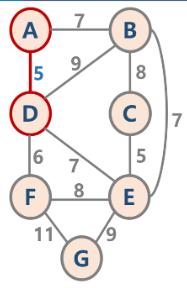

In [1]:
mygraph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': [
        (7, 'A', 'B'),
        (5, 'A', 'D'),
        (7, 'B', 'A'),
        (8, 'B', 'C'),
        (9, 'B', 'D'),
        (7, 'B', 'E'),
        (8, 'C', 'B'),
        (5, 'C', 'E'),
        (5, 'D', 'A'),
        (9, 'D', 'B'),
        (7, 'D', 'E'),
        (6, 'D', 'F'),
        (7, 'E', 'B'),
        (5, 'E', 'C'),
        (7, 'E', 'D'),
        (8, 'E', 'F'),
        (9, 'E', 'G'),
        (6, 'F', 'D'),
        (8, 'F', 'E'),
        (11, 'F', 'G'),
        (9, 'G', 'E'),
        (11, 'G', 'F')
    ]
}

In [4]:
parent = {} 
rank = {}

def find(node) : 
    #path compression 기법 
    if parent[node] != node : # parent node != node : node가 root node가 아님을 의미
        parent[node] = find(parent[node])
    return parent[node]

def union(node_v, node_u) : 
    root1 = find(node_v)
    root2 = find(node_u)
    
    # union_by_rank
    if rank[root1] > rank[root2] : 
        parent[root2] = root1
    else : 
        parent[root1] = root2
        if rank[root1] == rank[root2] : 
            rank[root2] += 1
            
def make_set(node) :
    # 초기화
    parent[node] = node
    rank[node] = 0 
    return parent[node]
  
def kruskal(graph) : 
    mst = [] 
    
    # 초기화
    for node in graph['vertices'] :
        make_set(node)
    
    # 간선 weight 기반 sorting 
    edges = graph['edges']
    edges.sort()
    
    # 사이클 없는 간선만 연결 
    for edge in edges : 
        weight, node_v, node_u = edge 
        if find(node_v) != find(node_u) : 
            union(node_u, node_v)
            mst.append(edge)
    
    return mst     

In [3]:
kruskal(mygraph)

[(5, 'A', 'D'),
 (5, 'C', 'E'),
 (6, 'D', 'F'),
 (7, 'A', 'B'),
 (7, 'B', 'E'),
 (9, 'E', 'G')]

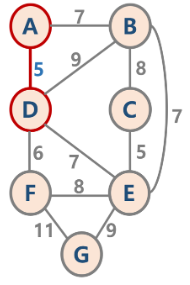

### 7. 시간 복잡도
- 크루스컬 알고리즘의 시간 복잡도는 O(E log E)
  - 다음 단계에서 2번, 간선을 비용 기준으로 정렬하는 시간에 좌우됨 (즉 간선을 비용 기준으로 정렬하는 시간이 가장 큼)
  1. 모든 정점을 독립적인 집합으로 만든다.
  2. 모든 간선을 비용을 기준으로 정렬하고, 비용이 작은 간선부터 양 끝의 두 정점을 비교한다.
     - 퀵소트를 사용한다면 시간 복잡도는 O(n log n) 이며, 간선이 n 이므로 O(E log E)
  3. 두 정점의 최상위 정점을 확인하고, 서로 다를 경우 두 정점을 연결한다. (최소 신장 트리는 사이클이 없으므로, 사이클이 생기지 않도록 하는 것임)
     - union-by-rank 와 path compression 기법 사용시 시간 복잡도가 결국 상수값에 가까움, O(1)

<img src="https://www.fun-coding.org/00_Images/kruscal_time.png">